<a href="https://colab.research.google.com/github/kimsang-kyu/Python_application/blob/main/20200520_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 단순 선형 회귀분석
 > 단순 선형 회귀 모형의 기본 가정
  - 선형성 : x와 y의 관계는 선형식으로 표현 가능
  - 독립성 : 오차는 서로 독립
  - 정규성 및 등 분산성

In [ ]:
#library
import pandas as pd
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = [168,160,170,158,176,161,180,183,180,167,179,171,166]
y = [179,169,180,160,178,170,183,187,179,172,181,173,165]

In [ ]:
df = pd.DataFrame({'x':x,'y':y})
df

,x,y
0,168,179
1,160,169
2,170,180
3,158,160
4,176,178
5,161,170
6,180,183
7,183,187
8,180,179
9,167,172


In [ ]:
# 변수별 자료 요약 
df.describe()

,x,y
count,13.000000,13.000000
mean,170.692308,175.076923
std,8.340510,7.686151
min,158.000000,160.000000
25%,166.000000,170.000000
50%,170.000000,178.000000
75%,179.000000,180.000000
max,183.000000,187.000000


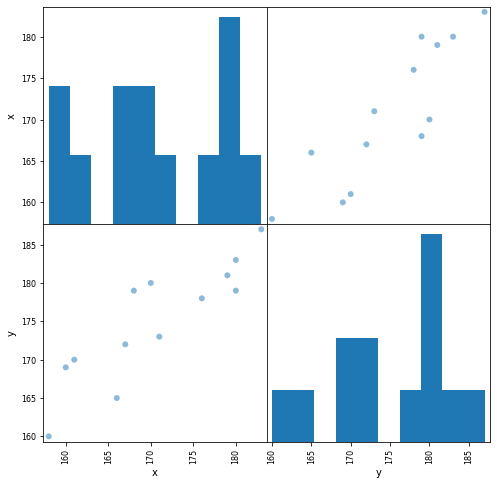

In [ ]:
# 산점도 행렬 
p = pd.plotting.scatter_matrix(df, figsize=(8, 8), marker='o') 

In [ ]:
### 단순 선형 회귀분석 
# Regression: y ~ x 
reg_simp = ols('y ~ x', data=df).fit() 
reg_simp.summary()


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     35.12
Date:                Wed, 20 May 2020   Prob (F-statistic):           9.92e-05
Time:                        02:18:48   Log-Likelihood:                -35.121
No. Observations:                  13   AIC:                             74.24
Df Residuals:                      11   BIC:                             75.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8090     23.187      1.631      0.131     -13.225      88.843
x              0.8042      0.136      5.927      0.000       0.506       1.103
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.394
Skew:                           0.013   Prob(JB):                        0.821
Kurtosis:                       2.148   Cond. No.                     3.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

아버지의 키가 1cm증가할 때 아들의 키는 0,8cm만큼 증가한다,

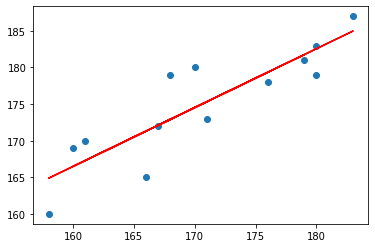

In [ ]:
# 산점도와 회귀직선 
plt.scatter(df['x'],df['y']) 
plt.plot(df['x'],reg_simp.predict(), 'red') 
plt.show()


### 다중 선형 회귀분석

 설명변수의 개수가 2개 이상인 것
 

In [ ]:
data_file = "https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Icecream.csv"
icecream= pd.read_csv(data_file)
icecream =icecream.drop(icecream.columns[0], axis=1)
icecream.head()

,cons,income,price,temp
0,0.386,78,0.270,41
1,0.374,79,0.282,56
2,0.393,81,0.277,63
3,0.425,80,0.280,68
4,0.406,76,0.272,69


In [ ]:
icecream.describe()

,cons,income,price,temp
count,30.000000,30.00000,30.000000,30.000000
mean,0.359433,84.60000,0.275300,49.100000
std,0.065791,6.24555,0.008342,16.421916
min,0.256000,76.00000,0.260000,24.000000
25%,0.311250,79.25000,0.268500,32.250000
50%,0.351500,83.50000,0.277000,49.500000
75%,0.391250,89.25000,0.281500,63.750000
max,0.548000,96.00000,0.292000,72.000000


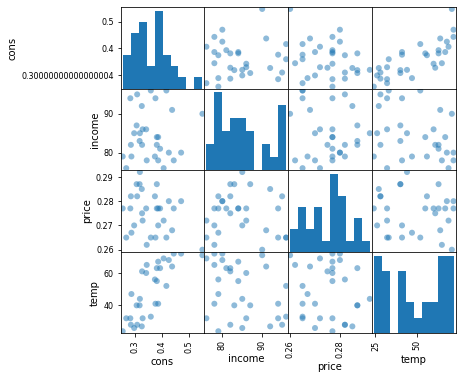

In [ ]:
#산점도
p = pd.plotting.scatter_matrix(icecream, figsize=(6,6), marker = 'o')

In [ ]:
##단순 선형 회귀분석
# Regrssion : 소비 금액(cons) - 평균기온(temps) 
reg_1 = ols('cons~ temp', data= icecream).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     42.28
Date:                Sun, 24 May 2020   Prob (F-statistic):           4.79e-07
Time:                        07:52:35   Log-Likelihood:                 53.383
No. Observations:                  30   AIC:                            -102.8
Df Residuals:                      28   BIC:                            -99.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2069      0.025      8.375      0.000       0.156       0.257
temp           0.0031      0.000      6.502      0.000       0.002       0.004
==============================================================================
Omnibus:                        3.763   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.260
Skew:                           0.577   Prob(JB):                        0.323
Kurtosis:                       3.688   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 - 기온이 1도 증가하면 소비 금액이 0.0031만큼 증가한다. p-value가 0.05보다 작으므로 대립가설을 채택한다.

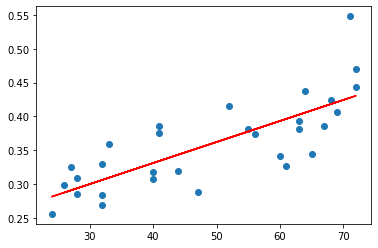

In [ ]:
plt.scatter(Icecream['temp'],Icecream['cons'])
plt.plot(Icecream['temp'],reg_1.predict(), 'red')
plt.show()


In [ ]:
### 단순선형 회귀분석
#Regression 2: 소비금액(cons) ~ 주당 평균 가족 소득(income)
reg_2 = ols('cons~income', data = icecream).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                   0.06449
Date:                Sun, 24 May 2020   Prob (F-statistic):              0.801
Time:                        07:57:46   Log-Likelihood:                 39.613
No. Observations:                  30   AIC:                            -75.23
Df Residuals:                      28   BIC:                            -72.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3167      0.169      1.878      0.071      -0.029       0.662
income         0.0005      0.002      0.254      0.801      -0.004       0.005
==============================================================================
Omnibus:                        4.223   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.877
Skew:                           0.733   Prob(JB):                        0.237
Kurtosis:                       3.387   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#다중 선형 회귀분석
# Regression 3: cons ~ temp + income
reg_3=ols('cons ~ temp + income', data=Icecream).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     31.81
Date:                Sun, 24 May 2020   Prob (F-statistic):           7.96e-08
Time:                        07:58:39   Log-Likelihood:                 57.742
No. Observations:                  30   AIC:                            -109.5
Df Residuals:                      27   BIC:                            -105.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1132      0.108     -1.045      0.305      -0.335       0.109
temp           0.0035      0.000      7.963      0.000       0.003       0.004
income         0.0035      0.001      3.017      0.006       0.001       0.006
==============================================================================
Omnibus:                        2.264   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.094
Skew:                           0.386   Prob(JB):                        0.579
Kurtosis:                       3.528   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

회귀 모형의 검정결과, 유의수준 0.05보다 작으므로 추정된 회귀모델은 유의하다고 할 수 있다.

In [ ]:
### 다중 선형 회귀분석
# Regression 4 : con ~ temp + income + price
reg_4=ols('cons ~ temp + income+price', data=Icecream).fit()
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     22.17
Date:                Sun, 24 May 2020   Prob (F-statistic):           2.45e-07
Time:                        08:01:22   Log-Likelihood:                 58.619
No. Observations:                  30   AIC:                            -109.2
Df Residuals:                      26   BIC:                            -103.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1973      0.270      0.730      0.472      -0.358       0.753
temp           0.0035      0.000      7.762      0.000       0.003       0.004
income         0.0033      0.001      2.824      0.009       0.001       0.006
price         -1.0444      0.834     -1.252      0.222      -2.759       0.671
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.047
Skew:                           0.038   Prob(JB):                        0.977
Kurtosis:                       3.179   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""